In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
telecom_cust = pd.read_csv('C:\\Users\\Butterfly\\Desktop\\Project\\WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#to know the column names 
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Let's explore the data to see if there are any missing values.




In [4]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df2.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [9]:
plot_churn=df2['Churn'].value_counts()
plot_churn # take the count

0    5163
1    1869
Name: Churn, dtype: int64

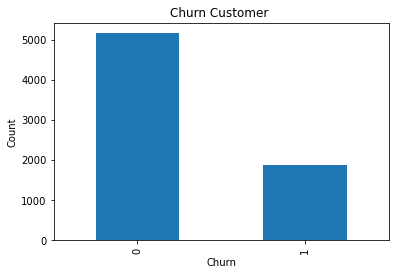

In [10]:
plot_churn.plot(kind="bar")
plt.title("Churn Customer ")# draw the graph based on that count
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


From the count a few of the customers are leave



In [11]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Gender based

In [12]:
plot_gender=df2['gender'].value_counts()
plot_gender # take the count(M/F)

Male      3549
Female    3483
Name: gender, dtype: int64

In [13]:
gender_male=df2[df2['gender']=='Male']# split the gender by Male
gender_male

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,0
7035,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,0
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [14]:
gender_count=gender_male['Churn'].value_counts()#count of male leave or not
gender_count

0    2619
1     930
Name: Churn, dtype: int64

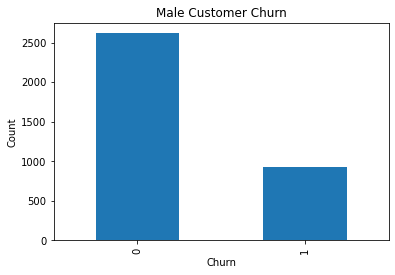

In [15]:
gender_count.plot(kind="bar")
plt.title("Male Customer Churn")# draw the graph based on that count
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

Outof 3555 Male 930 customers are churn out and 2619 customers are not churned out

In [16]:
gender_female=df2[df2['gender']=='Female']# split the gender by female
gender_female

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1
7036,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,0
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0


In [18]:
gender_countF=gender_female['Churn'].value_counts()#count of female leave or not
gender_countF

0    2544
1     939
Name: Churn, dtype: int64

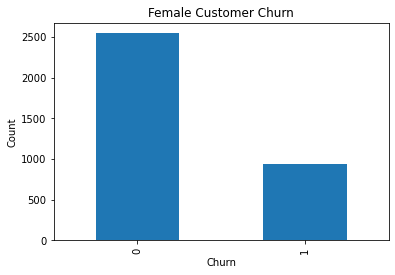

In [19]:
gender_countF.plot(kind="bar")
plt.title("Female Customer Churn")# draw the graph based on that count
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

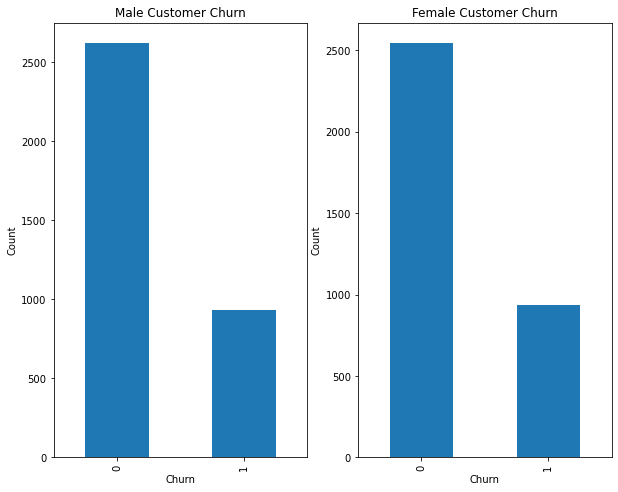

In [20]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
gender_count.plot(kind="bar")
plt.title("Male Customer Churn")# draw the graph based on that count
plt.xlabel("Churn")
plt.ylabel("Count")
plt.subplot(1,2,2)
gender_countF.plot(kind="bar")
plt.title("Female Customer Churn")# draw the graph based on that count
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [21]:
df2.groupby(['gender','Churn'])['Churn'].count()

gender  Churn
Female  0        2544
        1         939
Male    0        2619
        1         930
Name: Churn, dtype: int64

# SeniorCitizen Churn

In [23]:
df_snrctizn=df2['SeniorCitizen']
df_snrctizn

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7032, dtype: int64

In [24]:
df_SeniorCitizen=df2[df2['SeniorCitizen']==1] #list all seniorcitizen
df_SeniorCitizen

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
30,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,0
31,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,0
34,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,0
50,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,0
7029,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,0
7031,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,0
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1


In [25]:
Sncitizen_count=df_SeniorCitizen['Churn'].value_counts()
Sncitizen_count

0    666
1    476
Name: Churn, dtype: int64

# Non Seniorcitizen

In [26]:
nonSnCitizn=df2[df2['SeniorCitizen']==0]
nonSnCitizn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [27]:
non_Sncount=nonSnCitizn['Churn'].value_counts()
non_Sncount

0    4497
1    1393
Name: Churn, dtype: int64

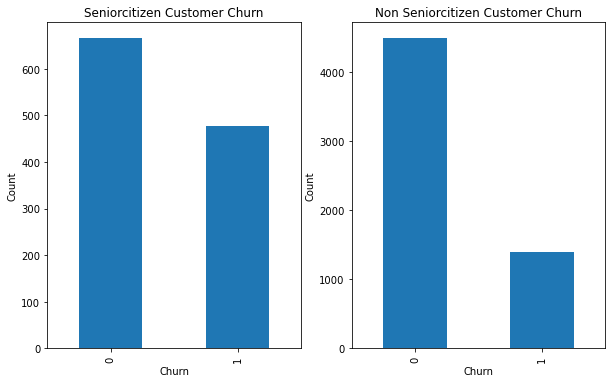

In [28]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
Sncitizen_count.plot(kind="bar")
plt.title("Seniorcitizen Customer Churn")# draw the graph based on that count
plt.xlabel("Churn")
plt.ylabel("Count")
plt.subplot(1,2,2)
non_Sncount.plot(kind="bar")
plt.title("Non Seniorcitizen Customer Churn")# draw the graph based on that count
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Partner

In [29]:
df2['Partner'].replace(to_replace='Yes', value=1, inplace=True)# replace the Yes No with 1 0
df2['Partner'].replace(to_replace='No',  value=0, inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [30]:
df_partner=df2['Partner'].value_counts()# get the 
df_partner

0    3639
1    3393
Name: Partner, dtype: int64

In [31]:
df_partnerYs=df2[df2['Partner']==1]
df_partnerYs.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
8,Female,0,1,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
10,Male,0,1,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,0
12,Male,0,1,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,0
15,Female,0,1,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,0


In [32]:
df_partnerYsCount=df_partnerYs['Churn'].value_counts()
df_partnerYsCount

0    2724
1     669
Name: Churn, dtype: int64

In [34]:
df_partnerNo=df2[df2['Partner']==0]
df_partnerNo.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,0,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1


In [35]:
df_partnerNoCount=df_partnerNo['Churn'].value_counts()
df_partnerNoCount

0    2439
1    1200
Name: Churn, dtype: int64

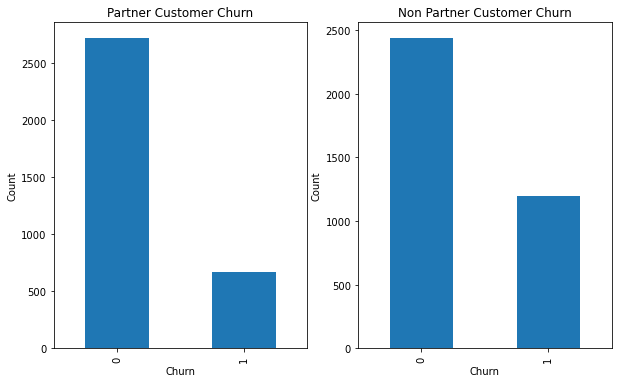

In [36]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df_partnerYsCount.plot(kind="bar")
plt.title("Partner Customer Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.subplot(1,2,2)
df_partnerNoCount.plot(kind="bar")
plt.title("Non Partner Customer Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Based on Dependents

In [37]:
df2['Dependents'].replace(to_replace='Yes', value=1, inplace=True)# replace the Yes No with 1 0
df2['Dependents'].replace(to_replace='No',  value=0, inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [38]:
df_Dependents=df2['Dependents'].value_counts()
df_Dependents

0    4933
1    2099
Name: Dependents, dtype: int64

In [39]:
df_DependentsYs=df2[df2['Dependents']==1]
df_DependentsYs

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,Male,0,0,1,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
9,Male,0,0,1,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0
10,Male,0,1,1,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,0
15,Female,0,1,1,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,0
17,Male,0,0,1,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,Male,0,1,1,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,1
7020,Male,0,1,1,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,0
7038,Male,0,1,1,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0


In [40]:
df_DependentsYsCount=df_DependentsYs['Churn'].value_counts()
df_DependentsYsCount

0    1773
1     326
Name: Churn, dtype: int64

In [42]:
df_DependentsNo=df2[df2['Dependents']==0]
df_DependentsNo.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [43]:
df_DependentsNoCount=df_DependentsNo['Churn'].value_counts()
df_DependentsNoCount

0    3390
1    1543
Name: Churn, dtype: int64

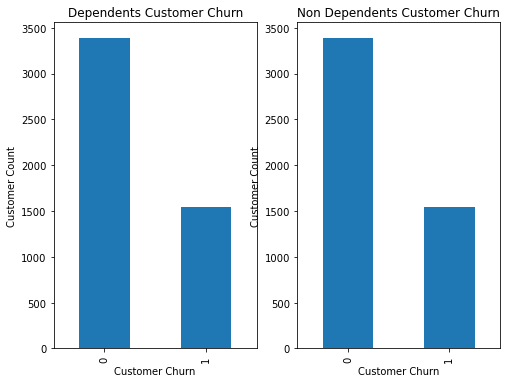

In [46]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
df_DependentsNoCount.plot(kind="bar")
plt.title("Dependents Customer Churn")
plt.xlabel("Customer Churn")
plt.ylabel("Customer Count")
plt.subplot(1,2,2)
df_DependentsNoCount.plot(kind="bar")
plt.title("Non Dependents Customer Churn")
plt.xlabel("Customer Churn")
plt.ylabel("Customer Count")
plt.show()

# Tenure Based 
Customer stay for month/day

In [47]:
df_tenure=df2[['tenure','Churn']]
df_tenure

,tenure,Churn
0,1,0
1,34,0
2,2,1
3,45,0
4,2,1
...,...,...
7038,24,0
7039,72,0
7040,11,0
7041,4,1


In [48]:
df2['tenure'].unique()#gets the unique value

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [49]:
df2['tenure'].nunique()# get the no of unique values

72

In [48]:
print(df2['tenure'].max(),df2['tenure'].min(),df2['tenure'].mean())

72 1 32.421786120591584


In [50]:
df2.groupby(['tenure','Churn'])['Churn'].count()

tenure  Churn
1       0        233
        1        380
2       0        115
        1        123
3       0        106
        1         94
4       0         93
        1         83
5       0         69
        1         64
6       0         70
        1         40
7       0         80
        1         51
8       0         81
        1         42
9       0         73
        1         46
10      0         71
        1         45
11      0         68
        1         31
12      0         79
        1         38
13      0         71
        1         38
14      0         52
        1         24
15      0         62
        1         37
16      0         52
        1         28
17      0         61
        1         26
18      0         73
        1         24
19      0         54
        1         19
20      0         53
        1         18
21      0         46
        1         17
22      0         63
        1         27
23      0         72
        1         13
24      0         71

In [55]:
df2['tenure'].value_counts().head(5)

1     613
72    362
2     238
3     200
4     176
Name: tenure, dtype: int64

In [52]:
tenure_Custmax=df2[df2['tenure']==72]
tenure_Custmax
tenure_Custmin=df2[df2['tenure']==1]
tenure_Custmin

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
20,Male,1,0,0,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
22,Male,0,0,0,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
27,Male,0,1,1,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,1
33,Male,0,0,0,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,Male,0,0,1,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,24.20,24.20,0
7010,Female,1,1,0,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,1
7016,Female,0,0,0,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,49.95,49.95,0
7018,Male,0,1,1,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,1


In [53]:
#max=362

tenure_CustmaxChurn=tenure_Custmax['Churn'].value_counts()
tenure_CustmaxChurn

0    356
1      6
Name: Churn, dtype: int64

362 customers stayed for a long time (72 month)
from this 356 are continuing and only 6 are churned

In [54]:
# Min=613

tenure_CustminCount=tenure_Custmin['Churn'].value_counts()
tenure_CustminCount

1    380
0    233
Name: Churn, dtype: int64

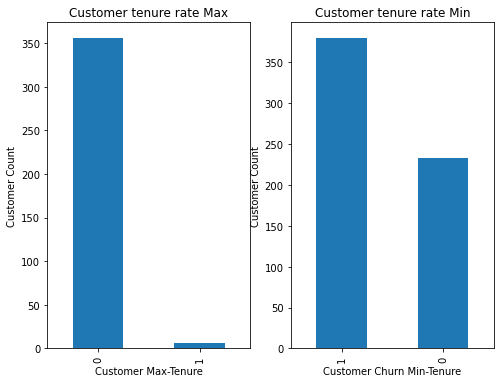

In [56]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
tenure_CustmaxChurn.plot(kind="bar")
plt.title("Customer tenure rate Max")
plt.xlabel("Customer Max-Tenure")
plt.ylabel("Customer Count")
plt.subplot(1,2,2)
tenure_CustminCount.plot(kind="bar")
plt.title("Customer tenure rate Min")
plt.xlabel("Customer Churn Min-Tenure")
plt.ylabel("Customer Count")
plt.show()

613 customers stayed for a long time (1 month) from this 233 are continuing and  380 are churned

# Tenure based gender analysis

In [59]:
tenure_genderM=tenure_Custmin[tenure_Custmin['gender']=='Male']
tenure_genderM.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,Male,1,0,0,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
22,Male,0,0,0,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
27,Male,0,1,1,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,1
33,Male,0,0,0,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,0
34,Male,1,0,0,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,0
70,Male,0,0,0,1,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,49.05,49.05,0
91,Male,1,0,0,1,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.70,0
100,Male,0,0,0,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,0
128,Male,0,0,0,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.75,19.75,0
133,Male,0,0,0,1,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.45,35.45,1


In [60]:
tenure_genderMChurn=tenure_genderM['Churn'].value_counts()
tenure_genderMChurn

1    194
0    135
Name: Churn, dtype: int64

In [62]:
tenure_genderF=tenure_Custmin[tenure_Custmin['gender']=='Female']
tenure_genderF.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
80,Female,0,0,1,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.35,79.35,1
101,Female,0,1,1,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.45,19.45,0
139,Female,1,1,0,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,1
180,Female,0,0,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.95,29.95,1
181,Female,0,0,0,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.30,45.30,0
185,Female,0,1,0,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,1
211,Female,0,0,0,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,25.25,25.25,0
227,Female,0,1,0,1,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Mailed check,55.20,55.20,1
282,Female,0,0,1,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.40,25.40,0


In [63]:
tenure_genderFChurn=tenure_genderF['Churn'].value_counts()
tenure_genderFChurn

1    186
0     98
Name: Churn, dtype: int64

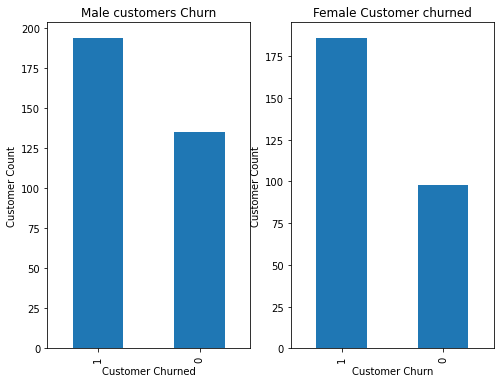

In [64]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
tenure_genderMChurn.plot(kind="bar")
plt.title("Male customers Churn")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,2,2)
tenure_genderFChurn.plot(kind="bar")
plt.title("Female Customer churned")
plt.xlabel("Customer Churn")
plt.ylabel("Customer Count")
plt.show()

In [67]:
min_tenure = df2[(df2['tenure']==1) & (df2['Churn']==1)]# easy way

In [68]:
min_tenure['gender'].value_counts()

Male      194
Female    186
Name: gender, dtype: int64

# 

# PhoneService

In [69]:
df2['PhoneService'].replace(to_replace='Yes', value=1, inplace=True)# replace the Yes No with 1 0
df2['PhoneService'].replace(to_replace='No',  value=0, inplace=True)
phone_df=df2
phone_df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [70]:
df_PhoneServ=df2['PhoneService'].value_counts()
df_PhoneServ

1    6352
0     680
Name: PhoneService, dtype: int64

In [71]:
df_PhoneServYs=df2[df2['PhoneService']==1]
df_PhoneServYs

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,0,0,72,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [72]:
df_PhoneServYsCount=df_PhoneServYs['Churn'].value_counts()
df_PhoneServYsCount

0    4653
1    1699
Name: Churn, dtype: int64

In [73]:
df_PhoneServNo=df2[df2['PhoneService']==0]
df_PhoneServNo

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
20,Male,1,0,0,1,0,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
27,Male,0,1,1,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,Male,0,0,0,26,0,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50,0
7007,Male,1,1,0,72,0,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,0
7029,Female,1,0,0,6,0,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,0
7036,Female,0,0,0,12,0,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,0


In [74]:
df_PhoneServNoCount=df_PhoneServYs['Churn'].value_counts()
df_PhoneServNoCount

0    4653
1    1699
Name: Churn, dtype: int64

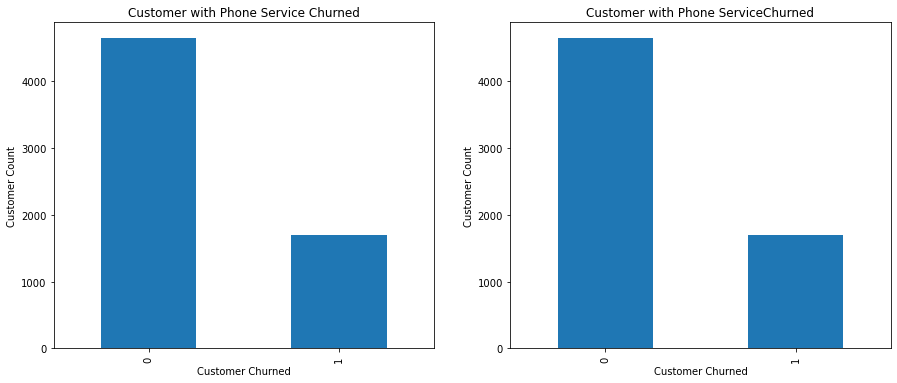

In [75]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
df_PhoneServYsCount.plot(kind="bar")
plt.title("Customer with Phone Service Churned")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,2,2)
df_PhoneServNoCount.plot(kind="bar")
plt.title("Customer with Phone ServiceChurned")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.savefig("Cust_PhoneService")

# MultipleLines

In [76]:
df2['MultipleLines'].replace(to_replace='Yes', value=1, inplace=True)# replace the Yes No with 1 0 2
df2['MultipleLines'].replace(to_replace='No',  value=0, inplace=True)
df2['MultipleLines'].replace(to_replace='No phone service',  value=2, inplace=True)

In [77]:
df_multiLine=df2['MultipleLines'].value_counts()
df_multiLine

0    3385
1    2967
2     680
Name: MultipleLines, dtype: int64

In [78]:
df_multiLineNo=df2[df2['MultipleLines']==0]
df_multiLineNo
df_multiLineYs=df2[df2['MultipleLines']==1]
df_multiLineYs
df_multiLineNps=df2[df2['MultipleLines']==2]
df_multiLineNps

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,2,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
3,Male,0,0,0,45,0,2,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
7,Female,0,0,0,10,0,2,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
20,Male,1,0,0,1,0,2,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
27,Male,0,1,1,1,0,2,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,Male,0,0,0,26,0,2,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50,0
7007,Male,1,1,0,72,0,2,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,0
7029,Female,1,0,0,6,0,2,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,0
7036,Female,0,0,0,12,0,2,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,0


In [79]:
df_multiLineNoCount=df_multiLineNo['Churn'].value_counts()  # multiple line=No
df_multiLineNoCount

0    2536
1     849
Name: Churn, dtype: int64

In [80]:
df_multiLineYsCount=df_multiLineYs['Churn'].value_counts() # multiple line=Yes
df_multiLineYsCount

0    2117
1     850
Name: Churn, dtype: int64

In [81]:
df_multiLineNpsCount=df_multiLineNps['Churn'].value_counts() #No phone service
df_multiLineNpsCount

0    510
1    170
Name: Churn, dtype: int64

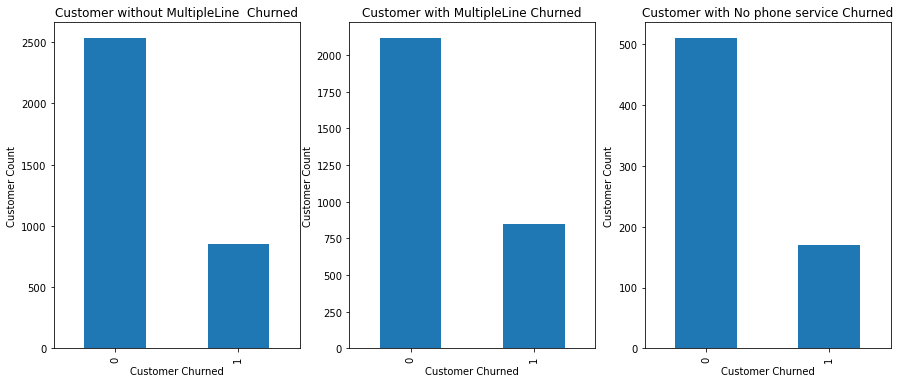

In [82]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df_multiLineNoCount.plot(kind="bar")
plt.title("Customer without MultipleLine  Churned")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,2)
df_multiLineYsCount.plot(kind="bar")
plt.title("Customer with MultipleLine Churned")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.subplot(1,3,3)
df_multiLineNpsCount.plot(kind="bar")
plt.title("Customer with No phone service Churned")
plt.xlabel("Customer Churned")
plt.ylabel("Customer Count")
plt.show()

# InternetService


In [83]:
df2['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [84]:
df2['InternetService'].replace(to_replace='Fiber optic', value=1, inplace=True)# replace the Yes No with 1 0 2
df2['InternetService'].replace(to_replace='DSL',  value=0, inplace=True)
df2['InternetService'].replace(to_replace='No phone service',  value=2, inplace=True)

In [79]:
df_internetFiber= df2[(df2['InternetService']=='Fiber optic') & (df2['Churn']==1)] #using Fiber Optics
df_internetFiberChurn=df_internetFiber['InternetService'].value_counts()   #(total=3096 Churned=1297 notchurn=1799)
df_internetFiberChurn

Fiber optic    1297
Name: InternetService, dtype: int64

In [80]:
df_internetDSL= df2[(df2['InternetService']=='DSL') & (df2['Churn']==1)]   #using  DSL
df_internetDSLChurn=df_internetDSL['InternetService'].value_counts()      #(total=2146 Churned=459 notchurn=1687)
df_internetDSLChurn

DSL    459
Name: InternetService, dtype: int64

In [81]:
df_internetNo= df2[(df2['InternetService']=='No') & (df2['Churn']==1)]   #using  No Internet
df_NOinternetChurn=df_internetNo['InternetService'].value_counts()      #(total=1520 Churned=113 notchurn=1407)
df_NOinternetChurn

No    113
Name: InternetService, dtype: int64

from the customer using internet service ,there is two types of service that company provide OFC and DSL
from analysis we know that 78% are using the internet service 

# OnlineSecurity

In [82]:
df_OnlineSecurity=df2['OnlineSecurity'].value_counts()
df_OnlineSecurity

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [83]:
df_OnlineSecurityNo= df2[(df2['OnlineSecurity']=='No') & (df2['Churn']==1)] # No OnlineSecurity
df_OnlineSecurityNoChurn=df_OnlineSecurityNo['OnlineSecurity'].value_counts()   #(total=3497 Churned=1461 notchurn=2036)
df_OnlineSecurityNoChurn

No    1461
Name: OnlineSecurity, dtype: int64

In [84]:
df_OnlineSecurityYs= df2[(df2['OnlineSecurity']=='Yes') & (df2['Churn']==1)] # Yes OnlineSecurity
df_OnlineSecurityYsChurn=df_OnlineSecurityYs['OnlineSecurity'].value_counts()   #(total=2015 Churned=295 notchurn=1720)
df_OnlineSecurityYsChurn

Yes    295
Name: OnlineSecurity, dtype: int64

In [85]:
df_OnlineSecuritNoNet= df2[(df2['OnlineSecurity']=='No internet service') & (df2['Churn']==1)] # No internet service
df_OnlineSecuritNoNetChurn=df_OnlineSecuritNoNet['OnlineSecurity'].value_counts()   #(total=1520 Churned=113 notchurn=1407)
df_OnlineSecuritNoNetChurn

No internet service    113
Name: OnlineSecurity, dtype: int64

# OnlineBackup

In [86]:
df_OnlineBackup=df2['OnlineBackup'].value_counts()
df_OnlineBackup

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [87]:
df_OnlineBackupNo= df2[(df2['OnlineBackup']=='No') & (df2['Churn']==1)] # No OnlineBackup
df_OnlineBackupNoChurn=df_OnlineBackupNo['OnlineBackup'].value_counts()   #(total=3087 Churned=1233 notchurn=1854)
df_OnlineBackupNoChurn

No    1233
Name: OnlineBackup, dtype: int64

In [88]:
df_OnlineBackupYs= df2[(df2['OnlineBackup']=='Yes') & (df2['Churn']==1)] # Yes OnlineBackup
df_OnlineBackupYsChurn=df_OnlineBackupYs['OnlineBackup'].value_counts()   #(total=2425 Churned=523 notchurn=1902)
df_OnlineBackupYsChurn

Yes    523
Name: OnlineBackup, dtype: int64

In [93]:
df_OnlineBackupNoNet= df2[(df2['OnlineBackup']=='No internet service') & (df2['Churn']==1)] # No internet service
df_OnlineBackupNoNetChurn=df_OnlineBackupNoNet['OnlineBackup'].value_counts()   #(total=1520 Churned=113 notchurn=1407)
df_OnlineBackupNoNetChurn

No internet service    113
Name: OnlineBackup, dtype: int64

# DeviceProtection

In [85]:
df_DeviceProtection=df2['DeviceProtection'].value_counts()
df_DeviceProtection

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [86]:
df_DeviceProtectionNo= df2[(df2['DeviceProtection']=='No') & (df2['Churn']==1)] # No Device protection
df_DeviceProtectionNoChurn=df_DeviceProtectionNo['DeviceProtection'].value_counts()   #(total=3094 Churned=1211 notchurn=1883)
df_DeviceProtectionNoChurn

No    1211
Name: DeviceProtection, dtype: int64

In [87]:
df_DeviceProtectionYs= df2[(df2['DeviceProtection']=='Yes') & (df2['Churn']==1)] # Yes Device protection
df_DeviceProtectionYsChurn=df_DeviceProtectionYs['DeviceProtection'].value_counts()   #(total=2418 Churned=545 notchurn=1873)
df_DeviceProtectionYsChurn

Yes    545
Name: DeviceProtection, dtype: int64

In [88]:
df_DeviceProtectionNoNet= df2[(df2['DeviceProtection']=='No internet service') & (df2['Churn']==1)]# No internet service
df_DeviceProtectionNoNetChurn=df_DeviceProtectionNoNet['DeviceProtection'].value_counts()   #(total=1520 Churned=113 notchurn=1407)
df_DeviceProtectionNoNetChurn

No internet service    113
Name: DeviceProtection, dtype: int64

# TechSupport

In [89]:
df_TechSupport=df2['TechSupport'].value_counts()
df_TechSupport

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [105]:
df_TechSupportNo= df2[(df2['TechSupport']=='No') & (df2['Churn']==1)] # No Technical support
df_TechSupportNoChurn=df_TechSupportNo['TechSupport'].value_counts()   #(total=3472 Churned=1446 notchurn=2026)
df_TechSupportNoChurn

No    1446
Name: TechSupport, dtype: int64

In [108]:
df_TechSupportYs= df2[(df2['TechSupport']=='Yes') & (df2['Churn']==1)] # Yes TechnicalSupport taken
df_TechSupportYsChurn=df_TechSupportYs['TechSupport'].value_counts()   #(total=2040 Churned=310 notchurn=1730)
df_TechSupportYsChurn

Yes    310
Name: TechSupport, dtype: int64

In [111]:
df_TechSupportNoNet= df2[(df2['TechSupport']=='No internet service') & (df2['Churn']==1)]# No internet service
df_TechSupportNoNetChurn=df_TechSupportNoNet['TechSupport'].value_counts()   #(total=1520 Churned=113 notchurn=1407)
df_TechSupportNoNetChurn

No internet service    113
Name: TechSupport, dtype: int64